In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('newsprint.mplstyle')

In [2]:
import sys
sys.path.append('../analysis')
import plotting
import text
from speeches import Speech, SpeechCollection

# Inaugural address word count

In [3]:
inaugural_speeches = SpeechCollection(['../data/tapp/inaugurals.json']).speeches

In [4]:
def iter_rows(speeches, stopwords=None):
    for speech in speeches:
        total_word_count = sum(1 for _ in text.tokenize(speech.text))
        content_word_count = sum(1 for _ in text.tokenize(speech.text, stopwords))
        yield dict(title=speech.title, 
                   author=speech.author, 
                   timestamp=speech.timestamp,
                   total_word_count=total_word_count, 
                   content_word_count=content_word_count)

In [5]:
df = pd.DataFrame(iter_rows(inaugural_speeches, text.standard_stopwords))
df['timestamp'] = pd.to_datetime(df.timestamp)
df['content_word_proportion'] = df.content_word_count / df.total_word_count

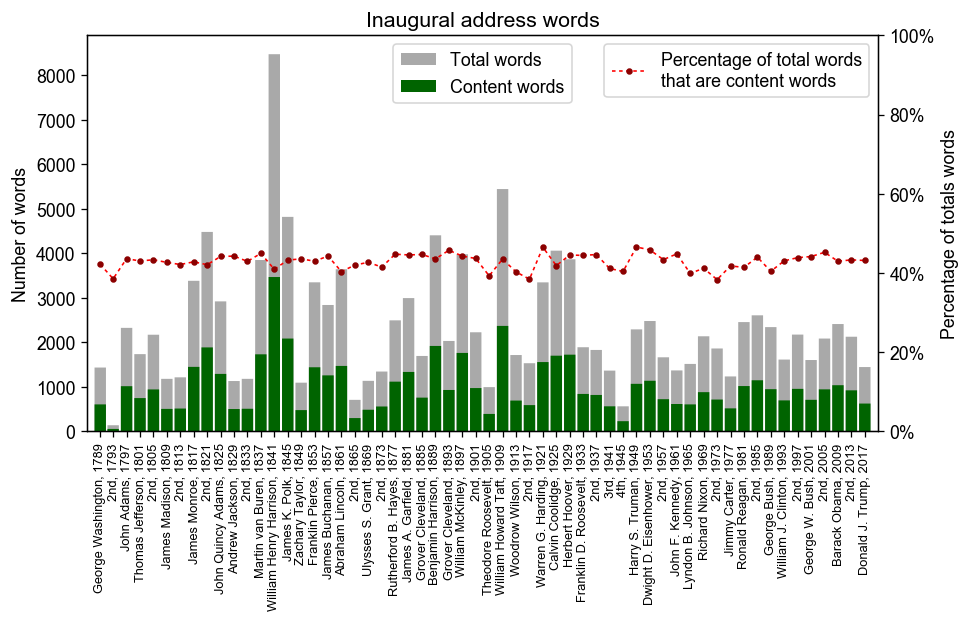

In [6]:
fig = plt.figure(figsize=(8.5, 5.5))
ax = fig.gca()
# matplotlib can't handle np.timestamp64 types
# pandas can't handle dual axes (at least, not well)
# so we meet in the awkward middle
timestamps = df.timestamp.tolist()
term_days = 365*4.0
bar_kwargs = dict(width=term_days * 0.85, snap=False)
ax.bar(timestamps, df.total_word_count, label='Total words', color='darkgray', **bar_kwargs)
ax.bar(timestamps, df.content_word_count, label='Content words', color='darkgreen', **bar_kwargs)
ax.set_ylabel('Number of words')

ax2 = ax.twinx()
ax2.plot(timestamps, df.content_word_proportion, label='Percentage of total words\nthat are content words', 
         marker='.', markeredgecolor='darkred', markerfacecolor='darkred',
         color='red', linewidth=1, linestyle='dotted', alpha=1)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.set_ylim(0, 1.0)
# ax2.set_ylim(0.2, 0.8)
ax2.set_ylabel('Percentage of totals words')

ticklabels = list(plotting.iter_inaugural_titles(inaugural_speeches))
ax.set_xticks(timestamps, minor=False)
ax.set_xticklabels(ticklabels, minor=False, rotation=90, size=8)
ax.set_xlabel('', visible=False)
plt.title('Inaugural address words')
ax.legend(loc='upper center')
ax2.legend(loc='upper right')
term_timedelta = pd.to_timedelta(term_days, 'D')
plt.xlim(timestamps[0] - term_timedelta, timestamps[-1] + term_timedelta)
plt.tight_layout()
# plt.savefig('Historical-inaugural-address-timeseries.pdf')

In [7]:
df

,author,content_word_count,timestamp,title,total_word_count,content_word_proportion
0,George Washington,603,1789-04-30 00:00:00,Inaugural Address,1431,0.421384
1,George Washington,52,1793-03-04 00:00:00,Second Inaugural Address,135,0.385185
2,John Adams,1012,1797-03-04 00:00:00,Inaugural Address,2322,0.435831
3,Thomas Jefferson,745,1801-03-04 00:00:00,Inaugural Address,1732,0.430139
4,Thomas Jefferson,939,1805-03-04 00:00:00,Second Inaugural Address,2168,0.433118
5,James Madison,502,1809-03-04 00:00:00,Inaugural Address,1177,0.426508
6,James Madison,510,1813-03-04 00:00:00,Second Inaugural Address,1211,0.421140
7,James Monroe,1446,1817-03-04 00:00:00,Inaugural Address,3379,0.427937
8,James Monroe,1883,1821-03-04 00:00:00,Second Inaugural Address,4477,0.420594
9,John Quincy Adams,1288,1825-03-04 00:00:00,Inaugural Address,2917,0.441550


In [14]:
# df[['total_word_count', 'content_word_count', 'content_word_proportion']].describe()
df.describe()

,content_word_count,total_word_count,content_word_proportion
count,58.000000,58.000000,58.000000
mean,1011.224138,2348.258621,0.428701
std,592.717206,1389.752440,0.019417
min,52.000000,135.000000,0.383002
25%,603.000000,1433.750000,0.417758
50%,923.000000,2102.500000,0.431872
75%,1279.750000,2896.750000,0.442481
max,3464.000000,8469.000000,0.465472
